In [1]:
#SVM
# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas as pd 
  
# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:

dataset = pd.read_csv("class A.csv") 
print (dataset.head) 

<bound method NDFrame.head of       satisfaction_level  left  last_evaluation  number_project  \
0                   0.14     0             0.43               2   
1                   0.10     1             0.55               2   
2                   0.10     1             0.55               2   
3                   0.10     1             0.55               2   
4                   0.21     0             0.43               2   
...                  ...   ...              ...             ...   
2995                0.31     0             0.63               4   
2996                0.31     0             0.63               4   
2997                0.47     0             0.46               2   
2998                0.47     0             0.46               2   
2999                0.11     1             0.86               6   

      average_montly_hours  time_spend_company  Work_accident  \
0                      238                   3              0   
1                      247         

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3000 non-null   float64
 1   left                   3000 non-null   int64  
 2   last_evaluation        3000 non-null   float64
 3   number_project         3000 non-null   int64  
 4   average_montly_hours   3000 non-null   int64  
 5   time_spend_company     3000 non-null   int64  
 6   Work_accident          3000 non-null   int64  
 7   promotion_last_5years  3000 non-null   int64  
 8   Department             3000 non-null   object 
 9   salary                 3000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 234.5+ KB


In [4]:
dataset.describe()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.0
mean,0.309750,0.613000,0.592067,3.185667,180.808667,3.519333,0.09600,0.0
std,0.121695,0.487145,0.141579,1.510173,54.086534,1.064896,0.29464,0.0
min,0.090000,0.000000,0.360000,2.000000,97.000000,2.000000,0.00000,0.0
25%,0.190000,0.000000,0.490000,2.000000,141.000000,3.000000,0.00000,0.0
50%,0.370000,1.000000,0.540000,2.000000,156.000000,3.000000,0.00000,0.0
75%,0.410000,1.000000,0.690000,4.000000,222.000000,4.000000,0.00000,0.0
max,0.500000,1.000000,1.000000,6.000000,310.000000,10.000000,1.00000,0.0


<AxesSubplot:>

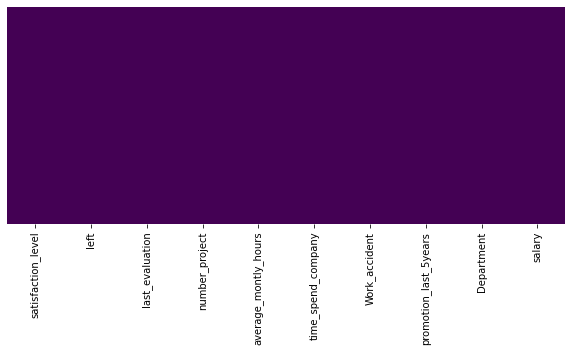

In [5]:
# heatmap to check the missing value 
plt.figure(figsize =(10, 4)) 
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:xlabel='left', ylabel='count'>

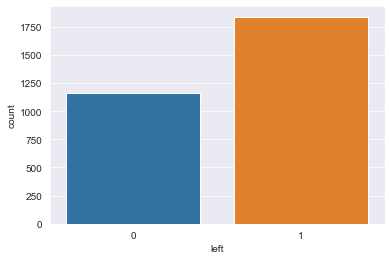

In [6]:
sns.set_style('darkgrid') 
sns.countplot(x ='left', data = dataset) 

In [7]:
len(object_col)

NameError: name 'object_col' is not defined

In [8]:

y = dataset.iloc[:, 1] 
x = dataset 
x.drop('left', axis = 1, inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [10]:
 
dum_Department = pd.get_dummies(dataset['Department'],  
                                prefix ='Department') 
dum_salary = pd.get_dummies(dataset['salary'],  
                                prefix ='salary') 

# Adding these dummy variable to input X 
X = pd.concat([x, dum_Department,  
               dum_salary], axis = 1) 
# Removing the categorical data 
X.drop(['Department', 'salary'],  
        axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape) 

(3000, 20)
(3000,)


In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.20)

In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC()

In [14]:
model.fit(X_train,y_train) 

SVC()

In [15]:
predictions=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [16]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print("MCC               ",matthews_corrcoef(y_test,predictions))

[[139  90]
 [ 47 324]]


              precision    recall  f1-score   support

           0       0.75      0.61      0.67       229
           1       0.78      0.87      0.83       371

    accuracy                           0.77       600
   macro avg       0.76      0.74      0.75       600
weighted avg       0.77      0.77      0.77       600



MCC                0.504501761082449


In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [19]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.613, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.613, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.613, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.610, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.610, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.892, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.871, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.877, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.898, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.969, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.938, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.931, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.925, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.908, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.946, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.923, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.923, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.927, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.958, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.933, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.935, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   15.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [21]:
grid.best_params_

{'C': 1000, 'gamma': 0.1}

In [22]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [23]:
grid_predictions=grid.predict(X_test)

In [24]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))
print('\n')
print("MCC               ",matthews_corrcoef(y_test,grid_predictions))

[[210  19]
 [ 13 358]]


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       229
           1       0.95      0.96      0.96       371

    accuracy                           0.95       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600



MCC                0.8866359116280932
